In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns; sns.set()
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [2]:
truncation_color = '#ffffbf'
onlap_color = '#2c7bb6'
horiz_color = '#d7191c'

from matplotlib.colors import LinearSegmentedColormap

truncCmap = LinearSegmentedColormap.from_list('mycmap', [truncation_color, onlap_color])
onlapCmap = LinearSegmentedColormap.from_list('mycmap', [truncation_color, onlap_color])
horizCmap = LinearSegmentedColormap.from_list('mycmap', [onlap_color, horiz_color])


In [3]:
data = pd.read_csv(r'F:\Geology\WSGS\Projects\jupyter\20neighbors.csv', index_col=[0])
data_subset0 = data.drop(['class'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
no_of_neighbors = 20

dataset = pd.read_csv(
    r"F:/Geology/WSGS/Projects/jupyter/"+str(no_of_neighbors)+"neighbors.csv",
    index_col=[0],
)

from sklearn.model_selection import train_test_split

# next let's split our toy data into training and test sets, choose how much with test_size of the data becomes the test set
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('class', axis=1),
    dataset['class'],
    test_size=0.9, #don't forget to change this
    random_state=86,
)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.9997058823529412

In [23]:
thickened = ['thickness neighbor 1', 'thickness neighbor 2',
       'thickness neighbor 3', 'thickness neighbor 4', 'thickness neighbor 5',
       'thickness neighbor 6', 'thickness neighbor 7', 'thickness neighbor 8',
       'thickness neighbor 9', 'thickness neighbor 10',
       'thickness neighbor 11', 'thickness neighbor 12',
       'thickness neighbor 13', 'thickness neighbor 14',
       'thickness neighbor 15', 'thickness neighbor 16',
       'thickness neighbor 17', 'thickness neighbor 18',
       'thickness neighbor 19', 'thickness neighbor 20', 'class']
logged = ['thickness natural log', 'thickness natural log neighbor 1',
       'thickness natural log neighbor 2', 'thickness natural log neighbor 3',
       'thickness natural log neighbor 4', 'thickness natural log neighbor 5',
       'thickness natural log neighbor 6', 'thickness natural log neighbor 7',
       'thickness natural log neighbor 8', 'thickness natural log neighbor 9',
       'thickness natural log neighbor 10',
       'thickness natural log neighbor 11',
       'thickness natural log neighbor 12',
       'thickness natural log neighbor 13',
       'thickness natural log neighbor 14',
       'thickness natural log neighbor 15',
       'thickness natural log neighbor 16',
       'thickness natural log neighbor 17',
       'thickness natural log neighbor 18',
       'thickness natural log neighbor 19',
       'thickness natural log neighbor 20', 'class']
powered = ['thickness power',
       'thickness power neighbor 1', 'thickness power neighbor 2',
       'thickness power neighbor 3', 'thickness power neighbor 4',
       'thickness power neighbor 5', 'thickness power neighbor 6',
       'thickness power neighbor 7', 'thickness power neighbor 8',
       'thickness power neighbor 9', 'thickness power neighbor 10',
       'thickness power neighbor 11', 'thickness power neighbor 12',
       'thickness power neighbor 13', 'thickness power neighbor 14',
       'thickness power neighbor 15', 'thickness power neighbor 16',
       'thickness power neighbor 17', 'thickness power neighbor 18',
       'thickness power neighbor 19', 'thickness power neighbor 20', 'class']
location = ['x location', 'y location', 'class']
og_thickness = ['thickness', 'class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(thickened, axis=1),
    dataset['class'],
    test_size=0.1, #don't forget to change this
    random_state=86,
)
neigh.fit(X_train, y_train)
thickness_removed = neigh.score(X_test, y_test)
print(f'Done with thickness. Accuracy is {thickness_removed:.2f}')

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(logged, axis=1),
    dataset['class'],
    test_size=0.1, #don't forget to change this
    random_state=86,
)
neigh.fit(X_train, y_train)
ln_removed = neigh.score(X_test, y_test)
print(f'Done with natural log. Accuracy is {ln_removed:.2f}')

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(powered, axis=1),
    dataset['class'],
    test_size=0.1, #don't forget to change this
    random_state=86,
)
neigh.fit(X_train, y_train)
power_removed = neigh.score(X_test, y_test)
print(f'Done with power. Accuracy is {power_removed:.2f}')

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(location, axis=1),
    dataset['class'],
    test_size=0.1, #don't forget to change this
    random_state=86,
)
neigh.fit(X_train, y_train)
location_removed = neigh.score(X_test, y_test)
print(f'Done with location. Accuracy is {location_removed:.2f}')

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(og_thickness, axis=1),
    dataset['class'],
    test_size=0.1, #don't forget to change this
    random_state=86,
)
neigh.fit(X_train, y_train)
og_t_removed = neigh.score(X_test, y_test)
print(f'Done with og thickness. Accuracy is {og_t_removed:.2f}')

Done with thickness. Accuracy is 1.00
Done with natural log. Accuracy is 0.20
Done with power. Accuracy is 1.00
Done with location. Accuracy is 1.00
Done with og thickness. Accuracy is 1.00


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('class', axis=1),
    dataset['class'],
    test_size=0.1, #don't forget to change this
    random_state=86,
)
neigh = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')
neigh.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [6]:
tops_api = pd.read_csv(r"F:\Geology\WSGS\Projects\jupyter\EarlyWSGS\ftunion.csv").fillna(
    0
)  # this file is available in the unconformity or onlap folder in the repo
iterable = ["Kfh",  "Kl", "Tfu"]
topcombos = list(zip(iterable, iterable[1:]))
number_of_tops = 2
no_of_neighbors = 20

#topcombos.append(("Kfh", "Kl"))
#topcombos.append(("Kl", "Tfu"))

In [7]:
# run this for all combinations of 2 tops and KNN
results = []
norm_all = []
probs_all = []
full_probs = []

for j in enumerate(topcombos):
    print(topcombos[j[0]])
    tops_api = pd.read_csv(r"F:\Geology\WSGS\Projects\jupyter\EarlyWSGS\ftunion.csv").fillna(
        0
    )  # this file is available in the unconformity or onlap folder in the repo
    fmtops = list(topcombos[j[0]])
    fmtops.extend(["x", "y"])
    tops = tops_api[fmtops]

    # calculate thicknesses and neighbors for the two tops
    hood = squareform(pdist(tops.iloc[:, -2:]))
    neighbors = []
    for i in enumerate(hood.argsort()[0:, 1 : no_of_neighbors + 1]):
        selected = (
            tops.iloc[hood.argsort()[i[0], 1 : no_of_neighbors + 1], 0:-2]
            .stack()
            .to_frame()
            .T
        )
        selected.columns = selected.columns.droplevel()
        neighbors.append(selected)
    frame = pd.concat(neighbors, sort=False)
    frame.index = range(len(frame))
    neighborhood = pd.concat([tops.iloc[:, :-2], frame], axis=1)
    thicknesses = neighborhood.diff(axis=1) * -1
    thicknesses[thicknesses < 0] = 0
    thicknesses.drop(columns=tops.columns[0], inplace=True)
    thicknesses[thicknesses < 0] = 0
    thicknesses[thicknesses > 3000] = 0
    locations = tops[["x", "y"]]
    real_world_log = thicknesses.apply(
        np.log
    )  # take the log of thicknesses for feature engineering
    real_world_pow = thicknesses.apply(
        lambda x: x ** 10
    )  # calculates the power values of thickness for another feature
    rw = (
        pd.concat(
            [thicknesses, real_world_log, real_world_pow, locations],
            axis=1,
            join_axes=[thicknesses.index],
        )
        .dropna()
        .replace(-np.inf, 0)
    )
    normalized_rw = (rw - rw.min()) / (rw.max() - rw.min()).replace(
        0, 0.00001
    )  # normalize the data from 0 to 1
    real_data = normalized_rw.values

    well_preds = neigh.predict(real_data) #knn predictions
    well_prob = neigh.predict_proba(real_data) #knn predictions
    full_probs.append(well_prob)
    probs = []
    for i in range(len(well_prob)):
        probs.append(well_prob[i].max())
    probs_all.append(probs)
    results.append(well_preds)
    norm_all.append(normalized_rw)

('Kfh', 'Kl')


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


('Kl', 'Tfu')


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


In [8]:
normalized_kl = norm_all[0]
normalized_tfu = norm_all[1]

normalized_kl.columns = data_subset0.columns.values
normalized_kl['class'] = results[0]
normalized_kl['prob'] = probs_all[0]

normalized_tfu.columns = data_subset0.columns.values
normalized_tfu['class'] = results[1]
normalized_tfu['prob'] = probs_all[1]

#df_subset = data#.sample(80000, random_state=20)
#df_subset['model'] = 'geometric' #this is geometric
normalized_kl['Formation'] = 'Kl' # this is lance
normalized_tfu['Formation'] = 'Tfu' # this is ft union

#df_combined = df_subset.append(normalized_kl, sort=False)
df_combined = normalized_kl
df_combined1 = df_combined.append(normalized_tfu, sort=False)


In [9]:
#df_subset = data.sample(5000)
df_subset1 = df_combined1.drop(['class', 'Formation', 'prob'], axis=1)
tsne = TSNE(n_components=2, verbose=0.2, perplexity=250, n_iter=500, learning_rate=50,random_state=20) #per=250, iter = 500, lr=50
tsne_results = tsne.fit_transform(df_subset1)

[t-SNE] Computing 751 nearest neighbors...
[t-SNE] Indexed 1776 samples in 0.019s...
[t-SNE] Computed neighbors for 1776 samples in 0.505s...
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.623096
[t-SNE] KL divergence after 500 iterations: 0.593327


In [10]:
probabilities = np.vstack(full_probs)

df_combined1['trunc_prob'] = probabilities[:,0]
df_combined1['onlap_prob'] = probabilities[:,1]
df_combined1['horiz_prob'] = probabilities[:,2]

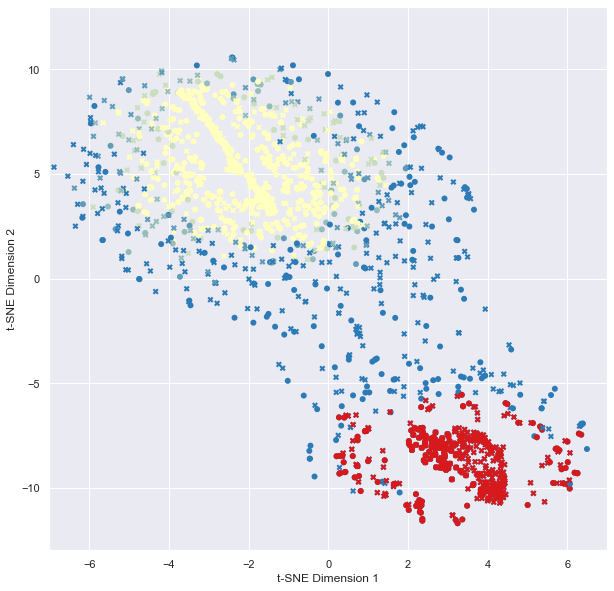

In [133]:
df_combined1['tsne-2d-one'] = tsne_results[:,0]
df_combined1['tsne-2d-two'] = tsne_results[:,1]
#df_combined1['tsne-2d-three'] = tsne_results[:,2]
color_pals = ['#ffffbf', '#2c7bb6', '#d7191c']
plt.figure(figsize=(10,10))
# 0 is truncation, 1 is onlap, 2 is horizontal
sns.scatterplot(
    x=df_combined1["tsne-2d-one"], y=df_combined1["tsne-2d-two"],
    hue=df_combined1["trunc_prob"]*-1,
    style=df_combined1['Formation'],
    palette=truncCmap,
    data=df_combined1,
    legend=None,
    alpha=1,
    edgecolor='none',
    vmin=-1, vmax=1
)
'''
sns.scatterplot(
    x=df_combined1["tsne-2d-one"], y=df_combined1["tsne-2d-two"],
    hue=df_combined1["onlap_prob"],
    style=df_combined1['Formation'],
    palette=onlapCmap,
    data=df_combined1,
    legend=None,
    #alpha=0.5,
    edgecolor='none'
)
'''
horizontals = df_combined1[(df_combined1.horiz_prob>0.)]
sns.scatterplot(
    x=horizontals["tsne-2d-one"], y=horizontals["tsne-2d-two"],
    hue=horizontals["horiz_prob"],
    style=horizontals['Formation'],
    palette=horizCmap,
    data=horizontals,
    legend=None,
    alpha=1,
    edgecolor='none',
    vmin=0,
    vmax=1
)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.xlim(-7,7)
plt.ylim(-13,13)
#plt.savefig('tsne.pdf', bbox_inches='tight')


In [11]:
x_locs = tops_api.x.append(tops_api.x,  ignore_index=True)
y_locs = tops_api.y.append(tops_api.y,  ignore_index=True)
api = tops_api.API.append(tops_api.API,  ignore_index=True)

df_combined1['x_locs'] =x_locs
df_combined1['y_locs'] = y_locs
df_combined1['api'] = api

In [12]:
ftunion = df_combined1[df_combined1['Formation']=='Tfu']
lancer = df_combined1[df_combined1['Formation']=='Kl']

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import itertools
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

In [14]:
geometry = [Point(xy) for xy in zip(ftunion.x_locs, ftunion.y_locs)]
crs = {"init": "epsg:3732"}
geo_df = GeoDataFrame(ftunion, crs={"init": "epsg:4326"}, geometry=geometry)
geo_df.to_file(
    driver="ESRI Shapefile",
    filename=r"F:\Geology\WSGS\Projects\Unconformity or onlap\predictions\shapefiles\ftunion_KNN_predictions_prob.shp",
)

geometry = [Point(xy) for xy in zip(lancer.x_locs, lancer.y_locs)]
crs = {"init": "epsg:3732"}
geo_df = GeoDataFrame(lancer, crs={"init": "epsg:4326"}, geometry=geometry)
geo_df.to_file(
    driver="ESRI Shapefile",
    filename=r"F:\Geology\WSGS\Projects\Unconformity or onlap\predictions\shapefiles\lance_KNN_predictions_prob.shp",
)

In [174]:
# run this for all combinations of 2 tops and KNN
from sklearn.neighbors import KNeighborsClassifier
import itertools
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

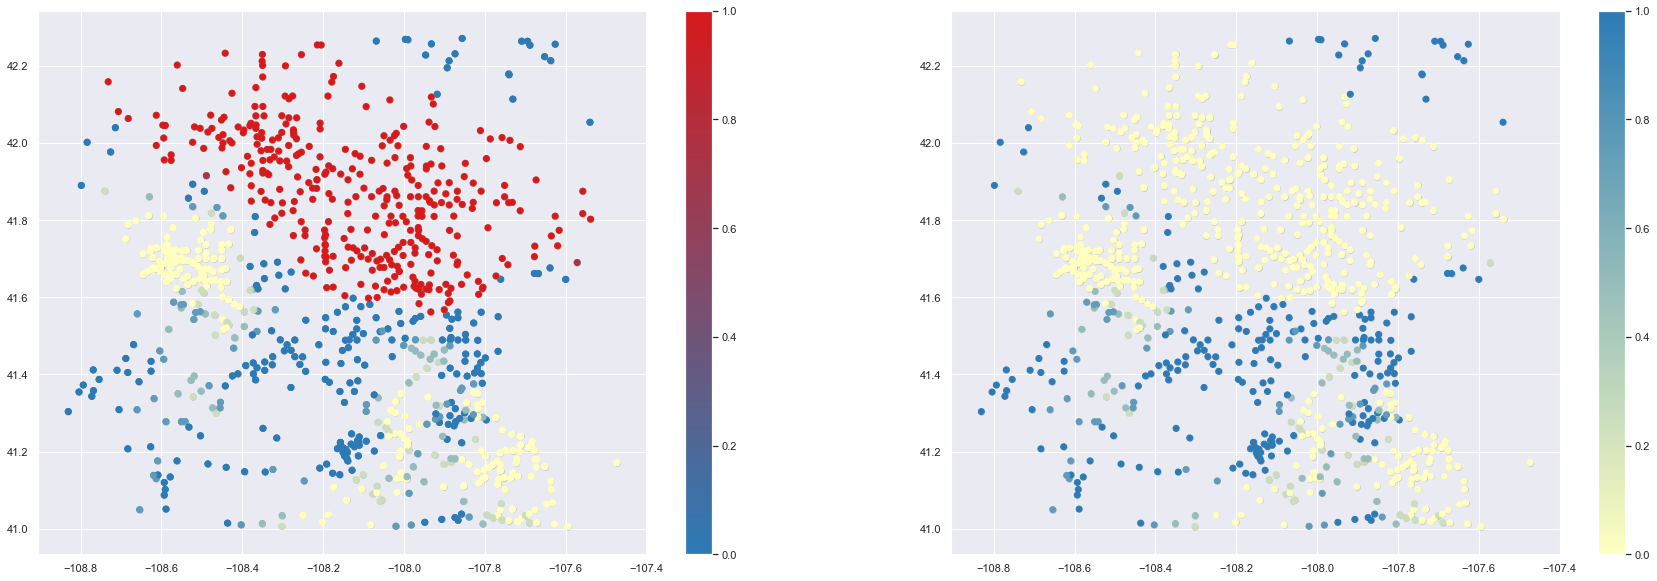

In [174]:
fthoriz = ftunion[(ftunion.horiz_prob>0.)]

plt.figure(figsize=(30,10))
plt.subplot(121)
plt.scatter(ftunion['x_locs'], ftunion['y_locs'], alpha=0.1, c='k')
plt.scatter(ftunion['x_locs'], ftunion['y_locs'], c=ftunion['trunc_prob']*-1, cmap=truncCmap, vmin=-1, vmax=0)
plt.scatter(ftunion['x_locs'], ftunion['y_locs'], c=ftunion['onlap_prob'], cmap=onlapCmap, vmin=0, vmax=1)
plt.scatter(fthoriz['x_locs'], fthoriz['y_locs'], c=fthoriz['horiz_prob'], cmap=horizCmap, vmin=0, vmax=1)
plt.colorbar()
plt.subplot(122)
plt.scatter(ftunion['x_locs'], ftunion['y_locs'], alpha=0.1, c='k')
plt.scatter(ftunion['x_locs'], ftunion['y_locs'], c=ftunion['onlap_prob'], cmap=onlapCmap)
plt.colorbar()
plt.savefig('tfu_probabilities.pdf')




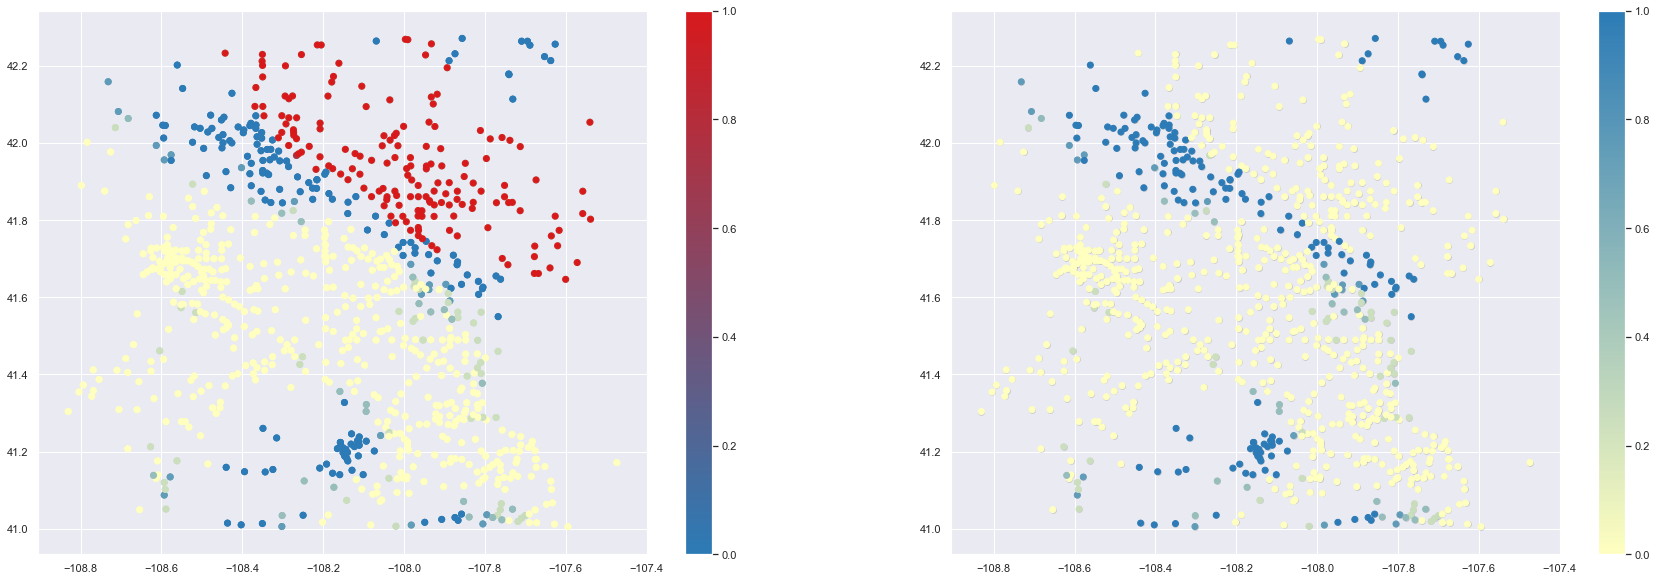

In [176]:
lahoriz = lancer[(lancer.horiz_prob>0.)]

plt.figure(figsize=(30,10))
plt.subplot(121)
plt.scatter(lancer['x_locs'], lancer['y_locs'], c=lancer['trunc_prob']*-1, cmap=truncCmap, vmin=-1, vmax=0)
plt.scatter(lancer['x_locs'], lancer['y_locs'], c=lancer['onlap_prob'], cmap=onlapCmap, vmin=0, vmax=1)
plt.scatter(lahoriz['x_locs'], lahoriz['y_locs'], c=lahoriz['horiz_prob'], cmap=horizCmap, vmin=0, vmax=1)
plt.colorbar()
plt.subplot(122)
plt.scatter(lancer['x_locs'], lancer['y_locs'], alpha=0.1, c='k')
plt.scatter(lancer['x_locs'], lancer['y_locs'], c=lancer['onlap_prob'], cmap=onlapCmap)
plt.colorbar()
plt.savefig('kla_probabilites.pdf')

In [228]:
test = df_combined1[df_combined1.Formation=='Kl']
test['t'] = full_probs[0][:,0]
test['o'] = full_probs[0][:,1]
test['h'] = full_probs[0][:,2]
trunc = test[(test.o <.6)&(test['class']==1)]
onl = test[test.o <0.6]
hor = test[test.h <0.6]

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py